In [0]:
import sys
v_path = '/opt/ros/kinetic/lib/python2.7/dist-packages'
if v_path in sys.path:
    sys.path.remove(v_path)
import numpy as np
import pandas as pd
from keras.applications.resnet50 import ResNet50
from keras.optimizers import SGD, Adam
from keras.models import Model

from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [ ]:
data = pd.read_csv('/files_path.csv')

In [0]:
data

,Unnamed: 0,img1,img2,label
0,0,Normal/ID (1)/LAT/LAT.jpg,Normal/ID (1)/AP/AP.jpg,0
1,1,Normal/ID (10)/LAT/LAT.jpg,Normal/ID (10)/AP/AP.jpg,0
2,2,Normal/ID (100)/LAT/LAT.jpg,Normal/ID (100)/AP/AP.jpg,0
3,3,Normal/ID (101)/LAT/LAT.jpg,Normal/ID (101)/AP/AP.jpg,0
4,4,Normal/ID (102)/LAT/LAT.jpg,Normal/ID (102)/AP/AP.jpg,0
...,...,...,...,...
673,323,Damaged/ID (95)/LAT/LAT.jpg,Damaged/ID (95)/AP/AP.jpg,1
674,324,Damaged/ID (96)/LAT/LAT.jpg,Damaged/ID (96)/AP/AP.jpg,1
675,325,Damaged/ID (97)/LAT/LAT.jpg,Damaged/ID (97)/AP/AP.jpg,1
676,326,Damaged/ID (98)/LAT/LAT.jpg,Damaged/ID (98)/AP/AP.jpg,1


In [0]:
BASE_DIR = '/content/drive/My Drive/Colab Notebooks/Training Data/Training/'

In [0]:
data

,Unnamed: 0,img1,img2,label
0,0,Normal/ID (1)/LAT/LAT.jpg,Normal/ID (1)/AP/AP.jpg,0
1,1,Normal/ID (10)/LAT/LAT.jpg,Normal/ID (10)/AP/AP.jpg,0
2,2,Normal/ID (100)/LAT/LAT.jpg,Normal/ID (100)/AP/AP.jpg,0
3,3,Normal/ID (101)/LAT/LAT.jpg,Normal/ID (101)/AP/AP.jpg,0
4,4,Normal/ID (102)/LAT/LAT.jpg,Normal/ID (102)/AP/AP.jpg,0
...,...,...,...,...
673,323,Damaged/ID (95)/LAT/LAT.jpg,Damaged/ID (95)/AP/AP.jpg,1
674,324,Damaged/ID (96)/LAT/LAT.jpg,Damaged/ID (96)/AP/AP.jpg,1
675,325,Damaged/ID (97)/LAT/LAT.jpg,Damaged/ID (97)/AP/AP.jpg,1
676,326,Damaged/ID (98)/LAT/LAT.jpg,Damaged/ID (98)/AP/AP.jpg,1


In [0]:
def make_square(fp):
    print(fp)
    image = cv2.imread(fp)
    print(image.shape)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    return image

In [0]:
image12 = cv2.imread(BASE_DIR + data['img1'][6])
s = np.array(image12)
print(s.shape)

(3040, 1517, 3)


In [0]:
X = []
y = []

for i in range(data.shape[0]):
# for i in range(5):
    print(i)
    fp1 = BASE_DIR + data['img1'][i]
    fp2 = BASE_DIR + data['img2'][i]
    if(os.path.exists(fp1) and os.path.exists(fp2)):
        image1 = make_square(fp1)
        image2 = make_square(fp2)
        datapoint = np.append(image1, image2, axis=2)
        X.append(datapoint)
        y.append(data['label'][i])
X = np.array(X)
y = np.array(y)

0
/content/drive/My Drive/Colab Notebooks/Training Data/Training/Normal/ID (1)/LAT/LAT.jpg
(2746, 1834, 3)
/content/drive/My Drive/Colab Notebooks/Training Data/Training/Normal/ID (1)/AP/AP.jpg
(2792, 1937, 3)
1
/content/drive/My Drive/Colab Notebooks/Training Data/Training/Normal/ID (10)/LAT/LAT.jpg
(2954, 1740, 3)
/content/drive/My Drive/Colab Notebooks/Training Data/Training/Normal/ID (10)/AP/AP.jpg
(2954, 1815, 3)
2
/content/drive/My Drive/Colab Notebooks/Training Data/Training/Normal/ID (100)/LAT/LAT.jpg
(2963, 1416, 3)
/content/drive/My Drive/Colab Notebooks/Training Data/Training/Normal/ID (100)/AP/AP.jpg
(2909, 1517, 3)
3
/content/drive/My Drive/Colab Notebooks/Training Data/Training/Normal/ID (101)/LAT/LAT.jpg
(3036, 1488, 3)
/content/drive/My Drive/Colab Notebooks/Training Data/Training/Normal/ID (101)/AP/AP.jpg
(3036, 1758, 3)
4
/content/drive/My Drive/Colab Notebooks/Training Data/Training/Normal/ID (102)/LAT/LAT.jpg
(2875, 1786, 3)
/content/drive/My Drive/Colab Notebooks/T

In [0]:
np.save('resized_images', X)
np.save('resized_labels', y)

In [ ]:
X = np.load('resized_images.npy')
y = np.load('resized_labels.npy')

In [0]:
X1 = X[:, :, :, 0].reshape(673, 224, 224, 1)
X2 = X[:, :, :, 5].reshape(673, 224, 224, 1)
X3 = np.zeros((673, 224, 224)).reshape(673, 224, 224, 1)

In [0]:
X.shape

(673, 224, 224, 6)

In [0]:
X_f = np.append(X1, X2, axis=3)
X_f = np.append(X_f, X3, axis=3)

In [0]:
X_f.shape

(673, 224, 224, 3)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.1)

In [0]:
X_train.shape

(605, 224, 224, 3)

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet import MobileNet
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.xception import Xception
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.initializers import glorot_uniform
from keras.layers import (Activation, BatchNormalization, Conv2D, Dense,
                          Dropout, Flatten, MaxPooling2D)
from keras.losses import binary_crossentropy
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from matplotlib import image
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


Using TensorFlow backend.


In [0]:
train_datagen = ImageDataGenerator(rotation_range=15,
	                          zoom_range=0.15,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.15,
                            horizontal_flip=True,
                            fill_mode="nearest")
test_datagen = ImageDataGenerator()
SEED = 1234

In [0]:
SEED = 1234
model = Sequential()
input_shape = (224, 224, 3)
model.add(Conv2D(16, (3, 3), input_shape=input_shape, kernel_initializer=glorot_uniform(seed=SEED)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.01), kernel_initializer=glorot_uniform(seed=SEED)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.01), kernel_initializer=glorot_uniform(seed=SEED)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.3, seed=SEED))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=l2(0.01), kernel_initializer=glorot_uniform(seed=SEED)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid', kernel_initializer=glorot_uniform(seed=SEED)))

model.compile(optimizer=SGD(lr=0.01, nesterov=True),
              loss=binary_crossentropy,
              metrics=['accuracy'])












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


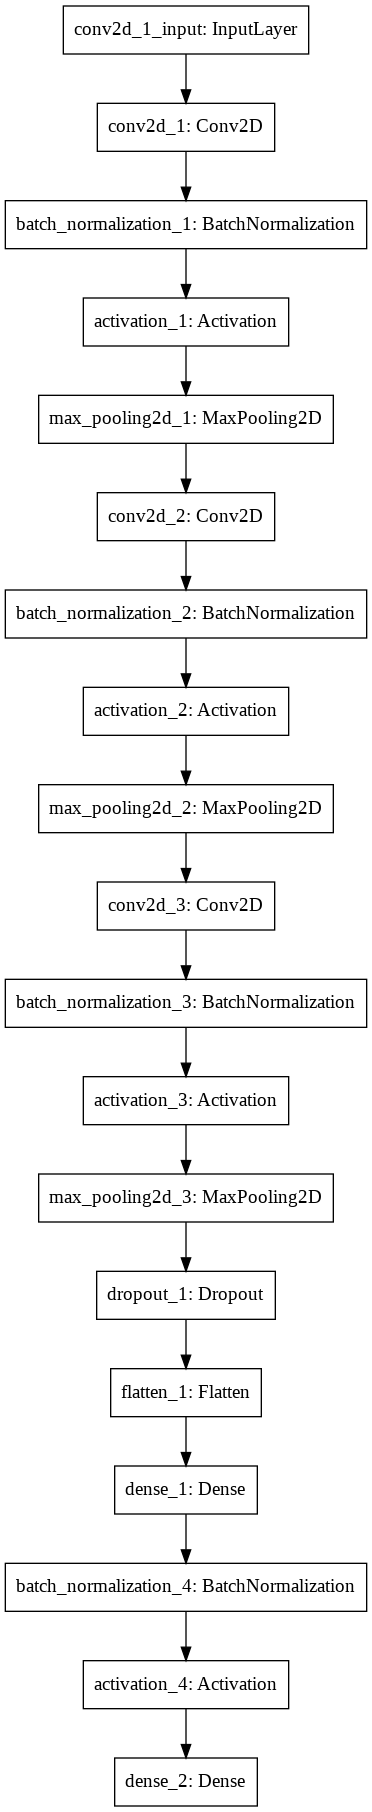

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
batch_size = 32
v_batch_size = 32

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    mode='auto',
    min_lr=0.0001)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='auto')
model_checkpoint = ModelCheckpoint(
    filepath='weights.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='auto')


### Fitting model to the data ###
history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=16),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=50,
    shuffle=False,
    validation_data=test_datagen.flow(X_test, y_test, batch_size=16),
    validation_steps=X_test.shape[0] // v_batch_size,
    callbacks=[reduce_lr, early_stopping, model_checkpoint])


Epoch 1/50
18/18 [==============================] - 9s 501ms/step - loss: 11.4349 - acc: 0.6424 - val_loss: 11.1492 - val_acc: 0.8438

Epoch 00001: val_loss improved from inf to 11.14923, saving model to weights.h5
Epoch 2/50
18/18 [==============================] - 1s 74ms/step - loss: 11.4273 - acc: 0.6354 - val_loss: 12.0944 - val_acc: 0.4688

Epoch 00002: val_loss did not improve from 11.14923
Epoch 3/50
18/18 [==============================] - 3s 171ms/step - loss: 11.1770 - acc: 0.7113 - val_loss: 11.1660 - val_acc: 0.8000

Epoch 00003: val_loss did not improve from 11.14923
Epoch 4/50
18/18 [==============================] - 3s 158ms/step - loss: 11.1857 - acc: 0.6458 - val_loss: 11.2586 - val_acc: 0.5000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 00004: val_loss did not improve from 11.14923
Epoch 5/50
18/18 [==============================] - 3s 144ms/step - loss: 11.0147 - acc: 0.7083 - val_loss: 10.9587 - val_acc: 0.7000

Epoch 0000

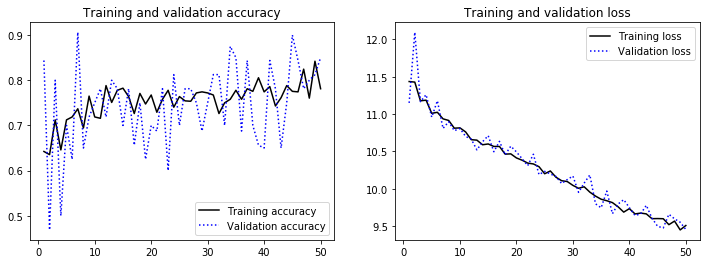

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = [n + 1 for n in range(len(acc))]
fig = plt.figure(figsize=(12, 4))

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'k', label='Training accuracy')
plt.plot(epochs, val_acc, 'b:', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

fig.add_subplot(1, 2, 2)
plt.plot(epochs, loss, 'k', label='Training loss')
plt.plot(epochs, val_loss, 'b:', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()